In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
claim = pd.read_csv('E:/data science assignment/5. Pandas Case Study 3 - Insurance Claims Case Study/claims.csv',parse_dates=True)
cust = pd.read_csv('E:/data science assignment/5. Pandas Case Study 3 - Insurance Claims Case Study/cust_demographics.csv',parse_dates=True)

In [3]:
#Q1.
final = pd.merge(claim, cust, left_on = 'customer_id',right_on = 'CUST_ID',how='inner')
final



,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
4,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,47830476,Female,01-May-86,MA,413-187-7945,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,09/06/2018,Auto,Yes,Material only,$1770,1.0,No,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,63269067,42364152,Other causes,05/09/2017,Home,No,Material only,$2800,1.0,No,42364152,Female,07-Jul-96,ID,529-462-1635,Silver
1082,22690595,19888166,Other driver error,05/15/2017,Auto,Yes,Injury only,$33080,2.0,No,19888166,Male,11-Apr-90,WI,712-651-9613,Gold
1083,12376894,11256802,Other driver error,04/18/2017,Auto,No,Material only,$2840,4.0,No,11256802,Female,22-Oct-64,LA,469-345-5617,Silver


In [4]:
#Q2
final['claim_date'] = pd.to_datetime(final.claim_date, format = '%m/%d/%Y')
final['DateOfBirth'] = pd.to_datetime(final.DateOfBirth,format='%d-%b-%y')
final['claim_id'] =final['claim_id'].astype(str)
final['customer_id'] = final['customer_id'].astype(str)
final['CUST_ID'] =final['CUST_ID'].astype(str)



In [5]:
#Q3.
final['claim_amount'] = final['claim_amount'].str.replace('$', ' ')



In [6]:
final['claim_amount'] = pd.to_numeric(final['claim_amount'],errors='coerce')

In [7]:
final.dtypes

claim_id                       object
customer_id                    object
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                  float64
total_policy_claims           float64
fraudulent                     object
CUST_ID                        object
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                        object
Segment                        object
dtype: object

In [8]:
#5.
final.drop_duplicates(subset='customer_id',keep='first',inplace=True)


In [9]:
#6. 
final.isna().sum()

claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
CUST_ID                 0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
dtype: int64

In [10]:
#6.
final['claim_amount'] = final.claim_amount.fillna(final.claim_amount.mean())
final['total_policy_claims'] = final.total_policy_claims.fillna(final.total_policy_claims.mean())
final.isna().sum()

claim_id               0
customer_id            0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
CUST_ID                0
gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
dtype: int64

In [11]:

def f_20_19(x):
    if x.year> 2000:
        x = x + pd.DateOffset(years = -100)
    else:
        x
    return x

In [12]:

final['DateOfBirth'] = final['DateOfBirth'].apply(f_20_19)

In [13]:
final['age'] = final.claim_date.dt.year-final.DateOfBirth.dt.year


In [14]:
#7
cat = pd.cut(final.age,bins=[0,17,29,59,99],labels=['Children','Youth','Adult','Senior'])
final.insert(16,'Age_group',cat)


In [15]:
#8
final.groupby('Segment').claim_amount.mean()

Segment
Gold        12756.479697
Platinum    12369.304648
Silver      12269.434851
Name: claim_amount, dtype: float64

In [16]:
#9..
date = pd.to_datetime('2018-10-01')
last_date = date - pd.DateOffset(days = -20)
df=final.loc[final.claim_date <= last_date,].reset_index(drop = True)
df

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,Age_group,age
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,Adult,38
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424,Female,1970-01-13,ME,265-543-1264,Silver,Adult,48
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,30308357,Female,1984-03-11,TN,798-631-4758,Silver,Adult,34
3,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,47830476,Female,1986-05-01,MA,413-187-7945,Silver,Adult,32
4,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,19269962,Male,1977-05-13,NV,956-871-8691,Gold,Adult,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051,62020796,79539873,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,79539873,Female,1981-03-15,ND,459-425-4319,Platinum,Adult,37
1052,63269067,42364152,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No,42364152,Female,1996-07-07,ID,529-462-1635,Silver,Youth,21
1053,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,19888166,Male,1990-04-11,WI,712-651-9613,Gold,Youth,27
1054,12376894,11256802,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,11256802,Female,1964-10-22,LA,469-345-5617,Silver,Adult,53


In [17]:
#10..
f_adult = final.loc[((final.State == 'TX') | (final.State =='DE') | (final.State =='AK')) &  (final.Age_group == 'Adult')]
amt = f_adult[f_adult['incident_cause'].str.contains("river")].customer_id.count()
print(amt,'adults from TX, DE and AK claimed insurance for driver related issues and causes')

24 adults from TX, DE and AK claimed insurance for driver related issues and causes


<function matplotlib.pyplot.show(*args, **kw)>

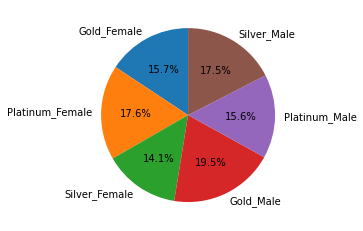

In [18]:
#11..
f_Gen_seg = final.groupby(['gender','Segment']).claim_amount.sum().reset_index()
f_Gen_seg['agg_col'] = f_Gen_seg[['Segment','gender']].agg('_'.join,axis=1)
f_Gen_seg.drop(['gender','Segment'],axis =1,inplace = True)
f_Gen_seg['perc_spend'] = (f_Gen_seg['claim_amount']/f_Gen_seg.claim_amount.sum())*100
plt.pie(f_Gen_seg.perc_spend, labels = f_Gen_seg.agg_col,autopct='%1.1f%%',startangle=90)
plt.show

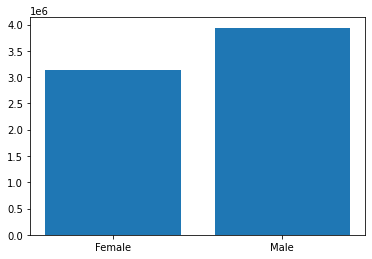

As shown in the graph Male reported the maximum cases regarding driver issues.


In [19]:
#12..
f_dri_rel = final[final['incident_cause'].str.contains("river")]
f_compare =  f_dri_rel.groupby('gender').claim_amount.sum().reset_index()
plt.bar(x = f_compare.gender, height = f_compare.claim_amount)
plt.show()
print('As shown in the graph Male reported the maximum cases regarding driver issues.')

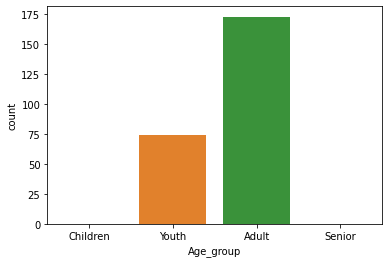

Adults have registered maximum fraud claims.


In [20]:
#13.
fraud = final[final.fraudulent == 'Yes']
fraud.groupby('Age_group').claim_id.count().reset_index()
sns.countplot(fraud.Age_group)
plt.show()
print('Adults have registered maximum fraud claims.' )

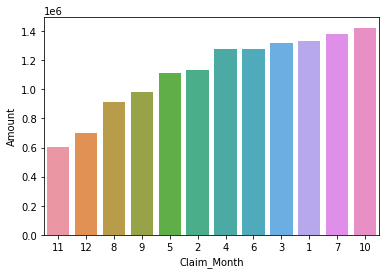

In [21]:
#14..
mon_spend = final.groupby(final.claim_date.dt.month).claim_amount.sum().reset_index().sort_values('claim_amount')
sns.barplot(x='claim_date',y= 'claim_amount',data=mon_spend,order= mon_spend['claim_date']) 
plt.xlabel("Claim_Month") 
plt.ylabel("Amount") 
plt.show() 

In [22]:
#15..
f_age_gen = final.groupby(['fraudulent','gender','Age_group']).claim_amount.mean().reset_index()
f_age_gen['claim_amount'] = f_age_gen.claim_amount.fillna(0)
f_age_gen

,fraudulent,gender,Age_group,claim_amount
0,No,Female,Children,0.000000
1,No,Female,Youth,12522.417294
2,No,Female,Adult,12383.774926
3,No,Female,Senior,0.000000
4,No,Male,Children,0.000000
5,No,Male,Youth,12217.043202
6,No,Male,Adult,12183.729275
7,No,Male,Senior,0.000000
8,Yes,Female,Children,0.000000
9,Yes,Female,Youth,7599.124835


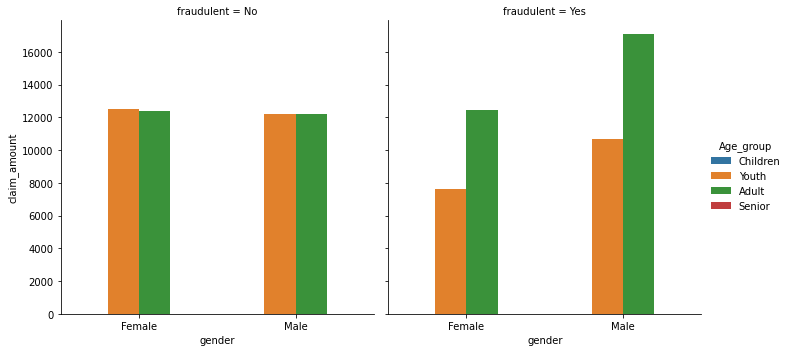

In [23]:
sns.catplot(data = f_age_gen, x = 'gender', y = 'claim_amount', hue = 'Age_group',col = 'fraudulent',kind= 'bar')

In [24]:
import scipy.stats as stats

### 16..
Ho = Mean of claim amount by the mens is same as the mean of claim amount by the women.

Ha = Mean of claim amount by the mens is not same as the mean of claim amount by the women

CI = 95%

p value = 0.05

In [25]:
# distribution of data
male = final[final.gender == 'Male'].claim_amount
female = final[final.gender == 'Female'].claim_amount
m_m = male.mean()
m_f = female.mean()
print('Mean of claim amount of male:', m_m, '|','Mean of claim amount of male:',m_f)

Mean of claim amount of male: 12822.81660016878 | Mean of claim amount of male: 12102.135592140887


In [26]:
stats.ttest_ind(male,female)


Ttest_indResult(statistic=0.8848703612768547, pvalue=0.3764242430541366)

###  Conclusion :
There is no similarity in the amount claimed by the male and female customer.

### 17..
Ho = There are no relationship between age category and segment.

Ha = There are significant relationship between age category and segment.

CI = 95%

P = 0.05

In [27]:
obs = pd.crosstab(final.Age_group,final.Segment)

In [28]:
stats.chi2_contingency(obs)

(1.786085862056675,
 0.40940805491231314,
 2,
 array([[110.81818182, 107.83116883, 103.35064935],
        [260.18181818, 253.16883117, 242.64935065]]))

### Conclusion:
There are no significant relation between Age group and Segment

### 18...

Ho = in 2018 the mean of claim amount has more than 10,000

Ha = The mean amount is lower or equal to 10,000

In [39]:
a1 = final.claim_amount.loc[final.claim_date.dt.year == 2018]
ttest = stats.ttest_1samp(a1,1000)
ttest.pvalue >0.05

False

We reject the null hypothesis

### 19..
Ho = There is no relation between Age group and Insurance claim amount.

Ha = There is relation between Age group and Insurance claim amount.

CI = 95%

p-value = 0.05



In [35]:
s1 = final.claim_amount.loc[final.Age_group == 'Adult']
s2 = final.claim_amount.loc[final.Age_group == 'Youth']
anova = stats.f_oneway(s1,s2)
anova.pvalue > 0.05

True

### Conclusion:
There is no corelation between Age group and claim amount.

### 20..
Ho = There are no relationship between total number of policy claims and the
claimed amount.

Ha = There are significant relationship between total number of policy claims and the claimed amount.


CI = 95%

p-value = 0.05

In [29]:
np.corrcoef(final.total_policy_claims, final.claim_amount)

array([[ 1.        , -0.01429114],
       [-0.01429114,  1.        ]])

### Conclusion :
There is no relation between total number of claim and total claimed amount.